In [ ]:
import keras 
import tensorflow as tf

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##Previewing

In [ ]:
import matplotlib.pyplot as plt

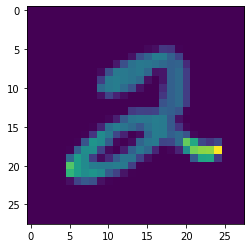

In [ ]:
# for i in range(1, 10)
plt.imshow(x_train[5])

##Image Input Size

In [ ]:
x_train.shape

(60000, 28, 28)

##Normalization

In [ ]:
import keras.utils

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#Intitalize Model

In [ ]:
model = keras.Sequential()

#Layers

In [ ]:
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dense(512, activation=keras.activations.relu))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))

#Declare Optimizer & Loss Fuction

In [ ]:
m_optimizer = keras.optimizers.adam_v2.Adam
m_loss = keras.losses.SparseCategoricalCrossentropy
type(m_loss)

type

##Preparing Model

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Training

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2067 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0856 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0568 - accuracy: 0.9822


##Testing

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(loss)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9765
0.07911454886198044
0.9764999747276306


##Prediction

####import

In [ ]:
import cv2
import numpy as np

###load image

In [ ]:
originalImage = cv2.imread('test_img1.jpg')
print(originalImage)

[[[248 255 249]
  [248 255 248]
  [255 255 251]
  ...
  [255 255 254]
  [255 254 254]
  [255 253 254]]

 [[253 255 251]
  [254 255 250]
  [255 255 254]
  ...
  [255 255 254]
  [255 254 254]
  [255 254 254]]

 [[255 253 250]
  [255 255 254]
  [255 254 255]
  ...
  [255 254 255]
  [255 254 255]
  [255 254 255]]

 ...

 [[255 254 254]
  [255 255 254]
  [255 255 255]
  ...
  [248 255 255]
  [251 255 255]
  [251 255 255]]

 [[255 253 254]
  [255 254 254]
  [255 254 255]
  ...
  [255 255 255]
  [255 255 254]
  [255 255 254]]

 [[255 253 254]
  [255 254 254]
  [255 254 255]
  ...
  [255 255 254]
  [255 255 252]
  [255 255 252]]]


##To Grey Scale

In [ ]:
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
ar = np.array(grayImage, dtype='uint8')
ar = np.reshape(ar, newshape=(1, 28, 28))
print(ar.shape)

(1, 28, 28)


##Predict

In [ ]:
# print(ar.shape)
predictions = model.predict(ar)
prediction = predictions[0]
np.argmax(prediction)

print(np.argmax(prediction))

7


##Figure Out

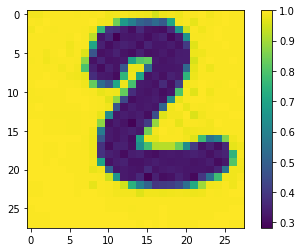

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(ar[0])
plt.colorbar()
plt.grid(False)
plt.show()